# Multiple Linear Regression

Predicting salary differences

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
# from pingouin import partial_corr
import statsmodels.api as sm
%matplotlib inline

In [3]:
df = pd.read_csv('salary.csv', delimiter=',')
df.dropna(inplace=True)
# df = df.drop(['degree','otherqual','position','male'], axis=1)

df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [4]:
y = pd.DataFrame(df.salary)
# df = df.drop(['salary'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state = 8)

In [5]:
X = X_train
y = y_train

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 salary   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.517e+31
Date:                Mon, 20 May 2019   Prob (F-statistic):                        0.00
Time:                        10:16:15   Log-Likelihood:                          7949.6
No. Observations:                 359   AIC:                                 -1.588e+04
Df Residuals:                     348   BIC:                                 -1.583e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
salary          1.0000   5.74e-16   1.74e+15      0.000       1.000       1.000
exprior     -3.872e-13   8.81e-13     -0.440      0.661   -2.12e-12    1.35e-12
yearsworked -9.024e-13   1.03e-12     -0.872      0.384   -2.94e-12    1.13e-12
yearsrank    6.466e-13   1.09e-12      0.592      0.554    -1.5e-12    2.79e-12
market       2.274e-12   2.58e-11      0.088      0.930   -4.85e-11    5.31e-11
degree       1.091e-11   1.61e-11      0.679      0.497   -2.07e-11    4.25e-11
otherqual   -9.095e-12   1.71e-11     -0.531      0.596   -4.28e-11    2.46e-11
position     3.524e-12   8.88e-12      0.397      0.692   -1.39e-11     2.1e-11
male                 0   1.08e-11          0      1.000   -2.12e-11    2.12e-11
Field        4.547e-13   2.79e-12      0.163      0.870   -5.02e-12    5.93e-12
yearsabs             0    2.6e-13          0      1.000   -5.12e-13    5.12e-13
==============================================================================
Omnibus:                       57.169   Durbin-Watson:                   0.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.691
Skew:                          -0.862   Prob(JB):                     3.38e-25
Kurtosis:                       5.136   Cond. No.                     4.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## a) Create scatterplots, histograms, and a descriptive statistics table of the variables of interest.

### Scatter Plots

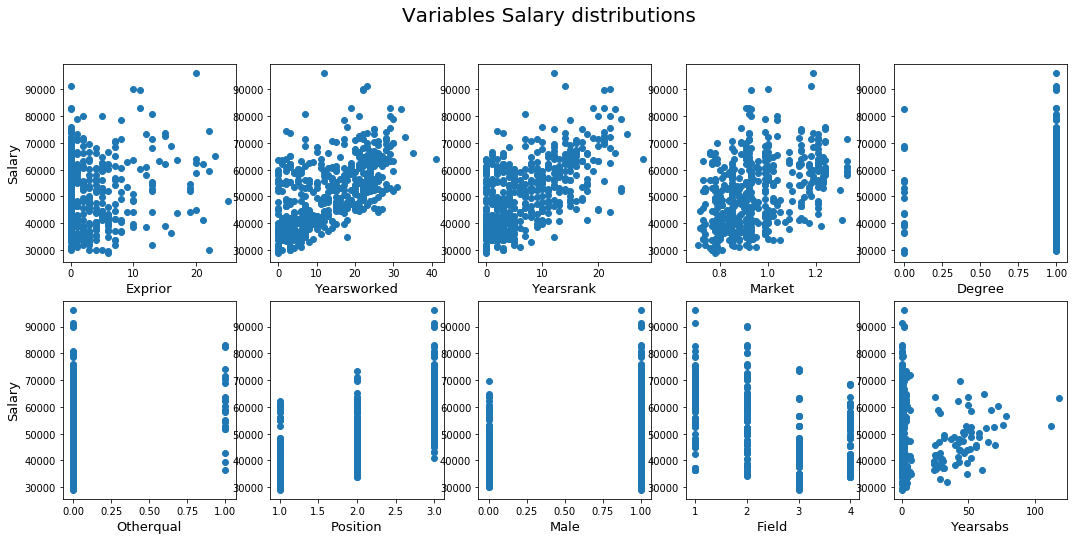

In [6]:
cols = 5
itr1 = 0
itr2 = 0

fig = plt.figure(figsize=(18,8))
fig.suptitle('Variables Salary distributions',fontsize=20)
axes = fig.subplots(nrows=2, ncols=cols)

for itm in df:
    if itm == 'salary':
        pass
    else:
        if itr1 < cols:
            axes[0,itr1].scatter(df[itm], df.salary)
            axes[0,itr1].set_xlabel(itm.capitalize(), fontsize = 13)
            if itr1 == 0:
                axes[0,itr1].set_ylabel('Salary', fontsize = 13)
            
            itr1 += 1
        else:
            axes[1,itr2].scatter(df[itm], df.salary)
            axes[1,itr2].set_xlabel(itm.capitalize(), fontsize = 13)
            if itr2 == 0:
                axes[1,itr2].set_ylabel('Salary', fontsize = 13)
            itr2 += 1
            itr1 += 1

### Histograms

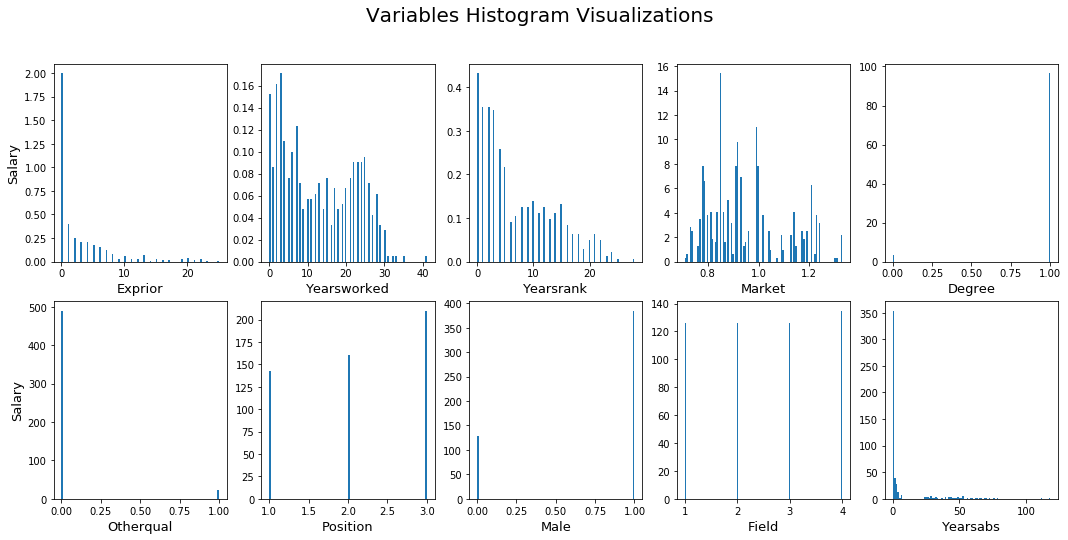

In [7]:
cols = 5
itr1 = 0
itr2 = 0

fig = plt.figure(figsize=(18,8))
fig.suptitle('Variables Histogram Visualizations',fontsize=20)
axes = fig.subplots(nrows=2, ncols=cols)

for itm in df:
    if itm == 'salary':
        pass
    else:
        if itr1 < cols:
            axes[0,itr1].hist(df[itm], density=True, bins = 100)
            axes[0,itr1].set_xlabel(itm.capitalize(), fontsize = 13)
            if itr1 == 0:
                axes[0,itr1].set_ylabel('Salary', fontsize = 13)
            
            itr1 += 1
        else:
            axes[1,itr2].hist(df[itm], bins = 100)
            axes[1,itr2].set_xlabel(itm.capitalize(), fontsize = 13)
            if itr2 == 0:
                axes[1,itr2].set_ylabel('Salary', fontsize = 13)
            itr2 += 1
            itr1 += 1

### Descriptive Statistics Table

In [8]:
df.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,50863.220098,2.931774,12.836257,7.046784,0.948558,0.964912,0.044834,2.130604,0.750487,2.526316,6.994152
std,12685.132358,4.794327,9.447040,6.419708,0.149524,0.184181,0.207142,0.819977,0.433153,1.126644,16.887552
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,1.000000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


## b) Recode the variable Field into three dummy variables, using HR as the reference category.  

## c) Produce a correlation matrix comparing the relationship of salary to the predictor variables. Is there any multicollinearity or other problems that may be a problem in the multiple regression?

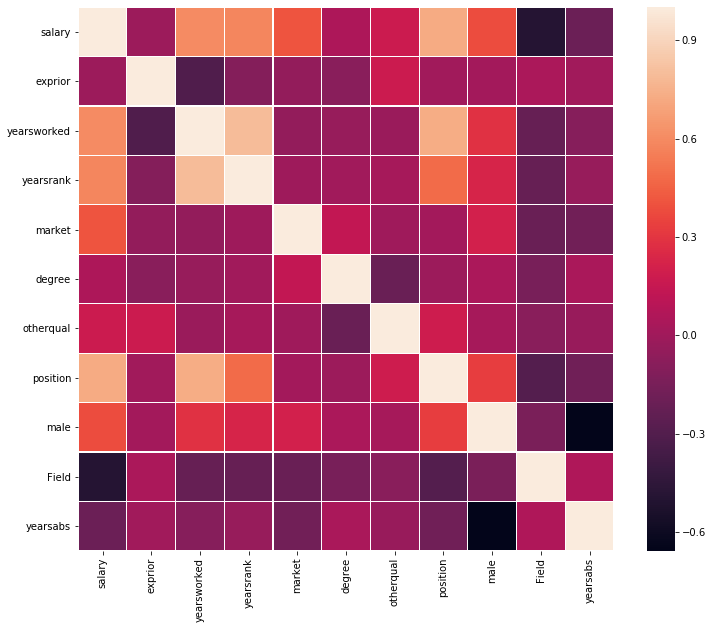

In [9]:
corrmat = X_train.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, linewidths=0.1)

There is no multicollinearity

## d) Run the multiple linear regression and interpret the correlation coefficients. What are the most important features when predicting employee salary?

In [10]:
# corrmat.salary.salary
print('The most important features when predicting employee salary are:')
print('  ')
features = ['salary']
for fld in df:
    if fld == 'salary':
        pass
    else:
        if corrmat.salary[fld] >= 0.4:
            print(str(fld.capitalize()) + ': ' + str(corrmat.salary[fld]))
            features.append(fld)

The most important features when predicting employee salary are:
  
Yearsworked: 0.6014087655121865
Yearsrank: 0.5804969655363894
Market: 0.4055245294579131
Position: 0.7239443797503643


## e) Plot the standardised residuals versus the standardised predicted values. Are there any problems with the regression?

In [11]:
# fig = plt.figure(figsize=(18,8))
# fig.suptitle('Variables Histogram Visualizations',fontsize=20)
# axes = fig.subplots(nrows=1, ncols=len(features))

# for f in features:
#     sns.residplot(x='hp', y='mpg', data=auto, color='green')


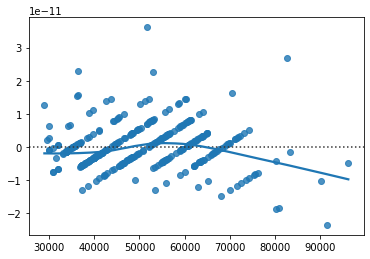

In [12]:
sns.residplot(model.fittedvalues, model.resid, lowess=True)

## f) Get and interpret the partial coefficients and tolerance values for the regression model. Are there any problems with this model?

In [13]:
# partial_corr(data=X_train, x=X_train.yearsworked, y=X_train.salary, covar=['covar1', 'covar2'], method='pearson')